In [140]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import warnings 
warnings.filterwarnings("ignore") 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from datetime import timedelta
from collections import Counter

In [141]:
county_confirmed=pd.read_csv('./data/county_confirmed.csv')
county_death=pd.read_csv('./data/county_death.csv')

Create a list `top10_popl` of top 10 counties by population

In [142]:
top5_popl=list(county_death.sort_values(by='Population', ascending=False)['Location'])[:5]
popl=list(county_death.sort_values(by='Population', ascending=False)['Population'])
top5_popl

['Los Angeles, California, US',
 'New York City, New York, US',
 'Cook, Illinois, US',
 'Harris, Texas, US',
 'Maricopa, Arizona, US']

In [143]:
county_confirmed.index=county_confirmed.iloc[:,3]
county_confirmed=county_confirmed.iloc[:,4:].T
county_confirmed.index.name='Date'
county_confirmed.index = pd.to_datetime(county_confirmed.index, format="%m/%d/%Y")
county_confirmed.head()

Location,"Autauga, Alabama, US","Baldwin, Alabama, US","Barbour, Alabama, US","Bibb, Alabama, US","Blount, Alabama, US","Bullock, Alabama, US","Butler, Alabama, US","Calhoun, Alabama, US","Chambers, Alabama, US","Cherokee, Alabama, US",...,"Park, Wyoming, US","Platte, Wyoming, US","Sheridan, Wyoming, US","Sublette, Wyoming, US","Sweetwater, Wyoming, US","Teton, Wyoming, US","Uinta, Wyoming, US","Unassigned, Wyoming, US","Washakie, Wyoming, US","Weston, Wyoming, US"
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [144]:
county_death.index=county_death.iloc[:,3]
county_death=county_death.iloc[:,5:].T
county_death.index.name='Date'
county_death.index = pd.to_datetime(county_death.index, format="%m/%d/%Y")
county_death.head()

Location,"Autauga, Alabama, US","Baldwin, Alabama, US","Barbour, Alabama, US","Bibb, Alabama, US","Blount, Alabama, US","Bullock, Alabama, US","Butler, Alabama, US","Calhoun, Alabama, US","Chambers, Alabama, US","Cherokee, Alabama, US",...,"Park, Wyoming, US","Platte, Wyoming, US","Sheridan, Wyoming, US","Sublette, Wyoming, US","Sweetwater, Wyoming, US","Teton, Wyoming, US","Uinta, Wyoming, US","Unassigned, Wyoming, US","Washakie, Wyoming, US","Weston, Wyoming, US"
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [145]:
print(county_confirmed.shape)
print(county_death.shape)

(220, 3340)
(220, 3340)


In [146]:
def train_linear_reg(data, name, test_size=0.20, predict_day=7, plot=True):
    split_day=int(math.floor((1-test_size)*(data.shape[0]-predict_day)))       # the first day of test
    x_train=data[:split_day]
    y_train=data[predict_day:split_day+predict_day]
    x_test=data[split_day:-predict_day]
    y_test=data[split_day+predict_day:]

    #linear regression fit
    l_reg = LinearRegression()
    l_reg.fit(x_train, y_train)
    predictions=l_reg.predict(x_test)
    
    #record error
    mape = np.mean(abs((y_test-predictions)/y_test))*100
    smape = np.mean((np.abs(predictions - y_test) * 200/ (np.abs(predictions) + np.abs(y_test))).fillna(0))
    error=pd.DataFrame({'Predicted days': predict_day, 'test group percent':test_size,'MAPE':mape, 'SMAPE': smape})
    if plot:
        print(error)                 #show errors with plot
    
    if plot:
        #plot Actual vs. Predicted for test group
        plt.figure(figsize=(12,6))
        plt.plot(y_train.append(y_test), color='b', label="Actual Data")
        plt.plot(y_test.index, predictions, label="Predicted Data, MAPE={}".format(round(mape[0],2)))
        plt.title('Actual vs. Predicted {} Case Counts with {}-day forecast for the Test Group'.format(name, predict_day), fontsize=16)
        plt.xlabel('Date', fontsize=16)
        plt.ylabel('Case Counts', fontsize=16)
        plt.xticks(rotation = 45)
        plt.legend(fontsize=13)
        plt.show()
    
    return error

In [155]:
#need to change the error_df to individual and general
def find_predict_day(data, name, error_7, error_14, start=7, end=21, plot=False, threshold=25):
    error_df=pd.DataFrame()
    for i in range(start,end+1,7):     #iterate between start and end 7 days at a time
        error_df=error_df.append(train_linear_reg(data, name, predict_day=i, plot=False))

    error_7.append(round(error_df['MAPE'].loc[error_df['Predicted days']==7].iloc[0], 2))
    error_14.append(round(error_df['MAPE'].loc[error_df['Predicted days']==14].iloc[0], 2))
    
    good_predict_day=0
    row=0
    for j in range(0,end//7):
        if error_df.iloc[j,2]<threshold:                           #MAPE<threshold
            good_predict_day=error_df.iloc[j,0]                    #last day that satisfies MAPE threshold
            row=j
    
    if plot:
        # plot good_predict_day's prediction
        _=train_linear_reg(data, name, predict_day=good_predict_day, plot=True)
        
        #plot MAPE vs predict_day
        plt.figure(figsize=(12,6))
        plt.plot(error_df['Predicted days'], error_df['MAPE'], color='b', marker='o', label="MAPE")
        plt.plot(error_df['Predicted days'], [threshold]*error_df.shape[0], color='r', label="threshold")
        plt.title('Moving Absolute Percentage Error (MAPE) vs. Predict Days for {} case counts'.format(name), fontsize=16)
        plt.xlabel('Number of Predicted Days', fontsize=16)
        plt.ylabel('MAPE', fontsize=16)
        plt.legend(fontsize=13)
        plt.show()
    return good_predict_day

In [156]:
conf_error_7=[]
conf_error_14=[]
good_predict_day_list=[]
for location in county_confirmed.columns:
    x=find_predict_day(county_confirmed[[location]], '{} Confirmed'.format(location),conf_error_7, conf_error_14, threshold=25)
    good_predict_day_list.append(x)

In [157]:
predict_days=Counter(good_predict_day_list)
percent_7=1-(predict_days[0])/len(good_predict_day_list)
percent_below_14=1-(predict_days[7]+predict_days[0])/len(good_predict_day_list)
print('Counties with 7 days forecast below 25% MAPE threshold for test groups: {}%'.format(round(percent_7*100,2)))
print('Counties with 14 days forecast below 25% MAPE threshold for test groups: {}%'.format(round(percent_below_14*100,2)))

Counties with 7 days forecast below 25% MAPE threshold for test groups: 85.69%
Counties with 14 days forecast below 25% MAPE threshold for test groups: 67.78%


In [158]:
predict_days

Counter({21: 1847, 7: 598, 14: 417, 0: 478})

85.69% of county confirmed data can produce a 7 days forecast with linear regression model that produces an MAPE of less than 25%. 67.78% can produce the 14 days forecast within threshold.

In [159]:
dea_error_7=[]
dea_error_14=[]
good_predict_day_list=[]
for location in county_death.columns:
    x=find_predict_day(county_death[[location]], '{} Confirmed'.format(location), dea_error_7, dea_error_14, threshold=25)
    good_predict_day_list.append(x)

In [164]:
predict_days=Counter(good_predict_day_list)
percent_7=1-(predict_days[0])/len(good_predict_day_list)
percent_below_14=1-(predict_days[7]+predict_days[0])/len(good_predict_day_list)
print('Counties with 7 days forecast below 25% MAPE threshold for test groups: {}%'.format(round(percent_7*100,2)))
print('Counties with 14 days forecast below 25% MAPE threshold for test groups: {}%'.format(round(percent_below_14*100,2)))

Counties with 7 days forecast below 25% MAPE threshold for test groups: 56.53%
Counties with 14 days forecast below 25% MAPE threshold for test groups: 47.46%


56.53% of county confirmed data can produce a 7 days forecast with linear regression model that produces an MAPE of less than 25%. 47.46% can produce the 14 days forecast within threshold.

In [71]:
def forecast_linear_reg(data, name, predict_day, forecast_df, error):
    l_reg = LinearRegression()
    
    #linear regression fit
    l_reg.fit(data[:-predict_day], data[predict_day:])
    predictions=l_reg.predict(data[-predict_day:])
        
    #add predictions to data
    loc=' '.join(name.split()[:-1])    #remove 'confirmed' or 'death'
    forecast_df[loc]=predictions        

In [72]:
predict_day=7
county_conf_7_forecast=pd.DataFrame(index=pd.to_datetime(county_confirmed[-predict_day:].index,format='%Y-%m-%d') + pd.to_timedelta(predict_day,unit='d'))
for i, location in enumerate(county_confirmed.columns):
    forecast_linear_reg(county_confirmed[[location]],"{} Confirmed".format(location),predict_day,county_conf_7_forecast, conf_error_7[i])

In [73]:
county_conf_7_forecast

,"Autauga, Alabama, US","Baldwin, Alabama, US","Barbour, Alabama, US","Bibb, Alabama, US","Blount, Alabama, US","Bullock, Alabama, US","Butler, Alabama, US","Calhoun, Alabama, US","Chambers, Alabama, US","Cherokee, Alabama, US",...,"Park, Wyoming, US","Platte, Wyoming, US","Sheridan, Wyoming, US","Sublette, Wyoming, US","Sweetwater, Wyoming, US","Teton, Wyoming, US","Uinta, Wyoming, US","Unassigned, Wyoming, US","Washakie, Wyoming, US","Weston, Wyoming, US"
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-29,1386.917173,4552.676920,672.713267,563.636569,1057.387933,560.026711,841.548971,2473.029912,911.047641,374.978255,...,174.005491,7.650516,141.520890,52.665054,319.799562,438.725123,302.331585,0.504717,120.650673,12.880157
2020-08-30,1389.084205,4588.335736,675.885843,571.409978,1060.760077,560.026711,843.599477,2484.516264,912.072738,376.104874,...,176.205196,7.650516,146.573405,54.928787,319.799562,447.380075,302.331585,0.504717,121.770708,12.880157
2020-08-31,1410.754528,4603.936468,680.115945,571.409978,1074.248653,560.026711,844.624730,2512.083507,912.072738,381.737965,...,176.205196,7.650516,151.625919,54.928787,319.799562,447.380075,302.331585,0.504717,121.770708,12.880157
2020-09-01,1410.754528,4622.880214,674.828318,572.520464,1097.853661,560.026711,843.599477,2524.718494,904.897056,379.484729,...,176.205196,7.650516,155.415306,54.928787,325.241023,450.625682,302.331585,0.504717,121.770708,12.880157
2020-09-02,1405.336948,4696.426521,662.138014,574.741438,1098.977709,558.984432,848.725742,2566.069359,903.871959,376.104874,...,178.404901,7.650516,159.204692,54.928787,325.241023,456.035027,308.615397,0.504717,121.770708,12.880157
2020-09-03,1408.587496,4733.199674,660.022963,576.962412,1111.342237,560.026711,852.826754,2577.555710,901.821764,381.737965,...,178.404901,7.650516,159.204692,54.928787,325.241023,456.035027,308.615397,-26.245283,121.770708,12.880157
2020-09-04,1421.589690,4767.744152,666.368115,579.183386,1115.838429,563.153549,853.852007,2612.014765,904.897056,381.737965,...,178.404901,7.650516,176.888494,54.928787,326.329316,463.608110,311.757303,-26.245283,121.770708,12.880157


In [74]:
predict_day=14
county_conf_14_forecast=pd.DataFrame(index=pd.to_datetime(county_confirmed[-predict_day:].index,format='%Y-%m-%d') + pd.to_timedelta(predict_day,unit='d'))
for i, location in enumerate(county_confirmed.columns):
    forecast_linear_reg(county_confirmed[[location]],"{} Confirmed".format(location),predict_day,county_conf_14_forecast, conf_error_14[i])

In [75]:
predict_day=7
county_dea_7_forecast=pd.DataFrame(index=pd.to_datetime(county_death[-predict_day:].index,format='%Y-%m-%d') + pd.to_timedelta(predict_day,unit='d'))
for i, location in enumerate(county_death.columns):
    forecast_linear_reg(county_death[[location]],"{} Death".format(location),predict_day,county_dea_7_forecast, dea_error_7[i])

In [76]:
predict_day=14
county_dea_14_forecast=pd.DataFrame(index=pd.to_datetime(county_death[-predict_day:].index,format='%Y-%m-%d') + pd.to_timedelta(predict_day,unit='d'))
for i, location in enumerate(county_death.columns):
    forecast_linear_reg(county_death[[location]],"{} Death".format(location),predict_day,county_dea_14_forecast, dea_error_14[i])

`county_conf_7_forecast`, `county_conf_14_forecast`, `county_dea_7_forecast` and `county_dea_14_forecast` stores the 7 days and 14 days forecast for confirmed and death case counts.

In [77]:
def plot_forecast(loc_list, name, predict_day, data, forecast, error_list):
    plt.figure(figsize=(12,6))
    plt.plot(data[loc_list[0]], color='b', label='Actual Data')
    for location in loc_list:
        plt.plot(data[location], color='b')
        conf_7=county_conf_7_forecast[location]
        index=list(county_conf_7_forecast.columns).index(location)
        # connect true data to forecasted data
        temp=data[location][-1:]
        temp.columns=[name]
        #include test data's MAPE in legend of prediction

        plt.plot(temp.append(forecast[location]),label="{} (estimated MAPE:{}%)".format(location, round(error_list[index],2)))

    plt.title('{} Days Forecast of {} Case Counts\nin the Top 5 Counties in the US with Highest Population'.format(predict_day, name), fontsize=16)
    plt.xlabel('Date', fontsize=16)
    plt.ylabel('Case Counts', fontsize=16)
    plt.xticks(rotation = 45)
    plt.legend(loc=2, fontsize=10)
    plt.show()

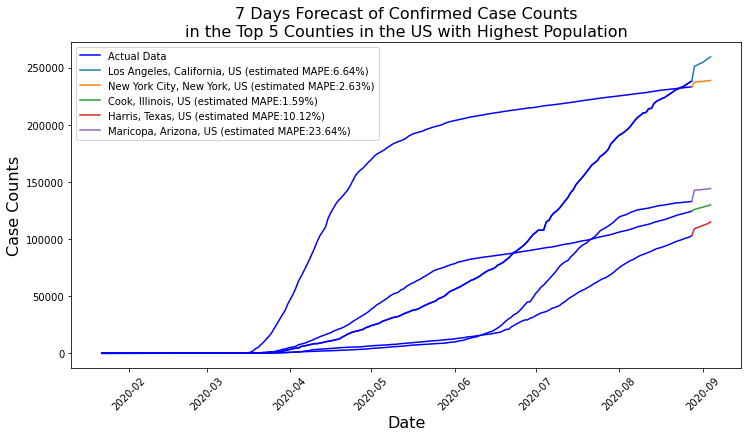

In [78]:
plot_forecast(top5_popl, 'Confirmed', 7, county_confirmed, county_conf_7_forecast, conf_error_7)

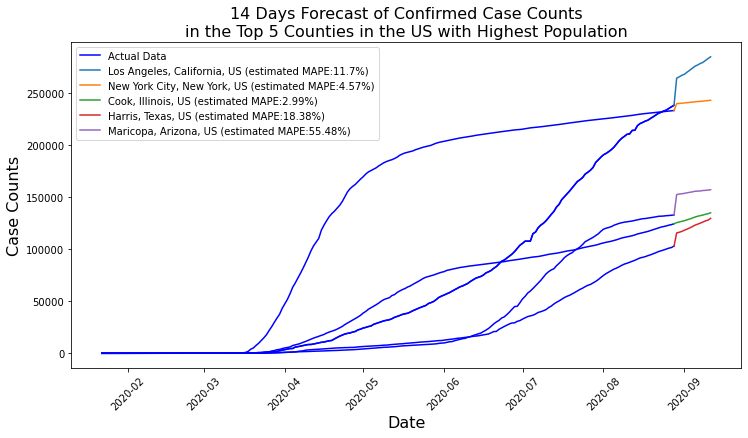

In [79]:
plot_forecast(top5_popl, 'Confirmed', 14, county_confirmed, county_conf_14_forecast, conf_error_14)

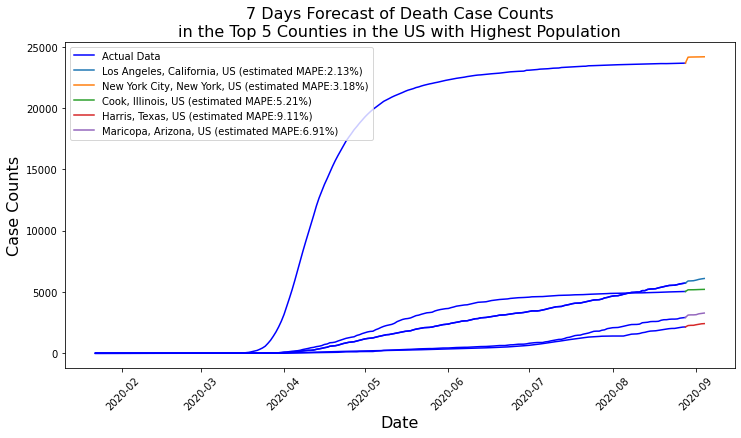

In [80]:
plot_forecast(top5_popl, 'Death', 7, county_death, county_dea_7_forecast, dea_error_7)

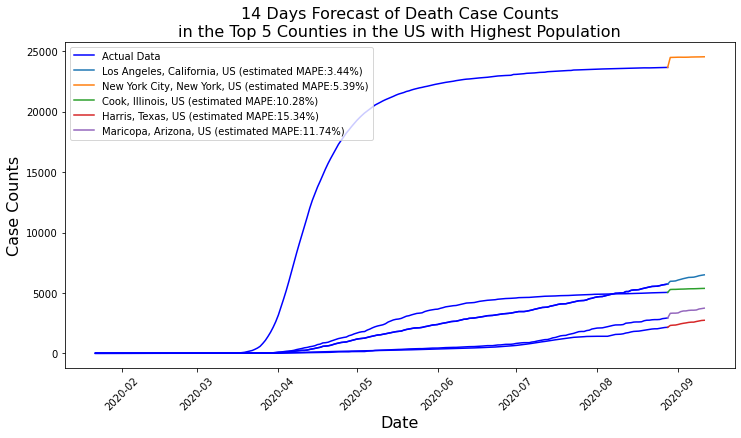

In [81]:
plot_forecast(top5_popl, 'Death', 14, county_death, county_dea_14_forecast, dea_error_14)

In [82]:
county_conf_7_forecast.to_csv('./forecast/county_conf_7_forecast.csv')
county_conf_14_forecast.to_csv('./forecast/county_conf_14_forecast.csv')
county_dea_7_forecast.to_csv('./forecast/county_dea_7_forecast.csv')
county_dea_14_forecast.to_csv('./forecast/county_dea_14_forecast.csv')